In [1]:
# "nbsphinx": "hidden"
import os

os.chdir("../../../tests/datasets")


# prevent write the galaxy into disk
from unittest import mock

patch = mock.patch("galaxychop.core.data.Galaxy.to_hdf5", return_value=None)
patch.start();

# Understanding the GalaxyChop Galaxies
GalaxyChop was designed around the definition of a Galaxy class, which encapsulates all the physical properties useful for the dynamic decomposition.

This chapter aims to explain the functionalities of a class Galaxy, which is represented with a class called `galaxychop.Galaxy`.

This tutorial will help the user to:

- Build a galaxy object 
- Understand deeply the Galaxy Class (attributes, properties and methods)

## 1. Creating the galaxy object
To create an object of type `Galaxy`, it is necessary to collect data from a single galaxy. The data should include stellar, dark matter, and gas particles, with their masses (`m`), positions (`x`, `y`, `z`), and velocities (`vx`, `vy`, `vz`).

There are several alternatives to load the `Galaxy` object:

- **Load Data Manually**: Manually input the required data.
- **Read Data from an npy File**: Load data from an npy file.
- **Read Data from an HDF5 File**: Retrieve data from an HDF5 file.

So, first of all, it is necessary to obtain a file with the appropriate content.

<div class="alert alert-warning">
**Note: Units**

To create a galaxy object, the data must be entered with units.

If you don't provide a unit, `Galaxychop` will assign:

- Solar Mass ($M\odot$) for Masses.
- Kiloparsec ($kpc$) for Positions.
- $Km/s$ for velocities.
- $(Km/s)^2$ for energy.

Finally, if the user provides a unit internally during calculations, the values will be converted to the default units.

For more information, please refer to the documentation of [Astropy Units](https://docs.astropy.org/en/stable/units/).
</div>


<div class="alert alert-info">
**Note: Files**

All the files used in this tutorial can be found 
[here](https://github.com/vcristiani/galaxy-chop/raw/master/tests/datasets/gal394242.h5).

For convenience, we have placed the files in the same folder where this tutorial is located.
</div>

### Load data manually

In this example, we demonstrate how to load data from three different files, each containing information for a specific type of particle (star, gas, and dark matter). Each file includes data on mass, positions, and velocities for each particle.

After that, we will create our `Galaxy` object using the [mkgalaxy()](../api/core/data.rst#galaxychop.core.data.mkgalaxy) function.


In [2]:
import numpy as np
import galaxychop as gchop

star = np.load("star_ID_394242.npy")
dark = np.load("dark_ID_394242.npy")
gas = np.load("gas_ID_394242.npy")

gal = gchop.mkgalaxy(
    m_s=star[:, 0],
    x_s=star[:, 1],
    y_s=star[:, 2],
    z_s=star[:, 3],
    vx_s=star[:, 4],
    vy_s=star[:, 5],
    vz_s=star[:, 6],
    m_dm=dark[:, 0],
    x_dm=dark[:, 1],
    y_dm=dark[:, 2],
    z_dm=dark[:, 3],
    vx_dm=dark[:, 4],
    vy_dm=dark[:, 5],
    vz_dm=dark[:, 6],
    m_g=gas[:, 0],
    x_g=gas[:, 1],
    y_g=gas[:, 2],
    z_g=gas[:, 3],
    vx_g=gas[:, 4],
    vy_g=gas[:, 5],
    vz_g=gas[:, 6],
)
gal

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=False>

#### Specific Potential Energy

Specific Potential Energy can be calculated or loaded according to user requirements:

##### Calculating specific potential energy

The package allows the calculation of the specific potential energy of each particle.

Using the [preproc.potential()](../api/preproc/potential_energy.rst) function, users can choose between the 'numpy' or 'fortran' backends to perform the calculation, and can set the softening value for each particle type (default=0.0).

Users can validate whether the instantiated galaxy has potential by using the following sentence:

In [3]:
print("Galaxy has potential:", gal.has_potential_)

Galaxy has potential: False


Galaxychop provides the `gchop.preproc.potential` function, which calculates
the potentials of particles in the galaxy and creates a new galaxy
incorporating the calculated potentials.

Two computation backends are offered based on the user's needs:

- `numpy`: It is slow and consumes a lot of memory but is portable.
- `fortran`: Depending on the installation, it may not be available. If present, it is the default choice.


In [4]:
galp = gchop.preproc.potential(gal)  # this can be slow

Now we can recheck if the new galaxy has the calculated potential:

In [5]:
print("Galaxy has potential:", galp.has_potential_)

Galaxy has potential: True


##### Load potential from a fila
 
The specific potential energy for all particles can be loaded at the same time as the galaxy is instantiated. Particle potentials can be included as attributes of the `mkgalaxy` function, along with the softening parameter.

<div class="alert alert-warning">
Note: Specific potential energy

It's important to note that the potential energy used in GalaxyChop is the **specific potential energy**.
</div>

In [6]:
pot_star = np.load("potential_star_ID_394242.npy")
pot_dark = np.load("potential_dark_ID_394242.npy")
pot_gas = np.load("potential_gas_ID_394242.npy")


galpot = gchop.mkgalaxy(
    m_s=star[:, 0],
    x_s=star[:, 1],
    y_s=star[:, 2],
    z_s=star[:, 3],
    vx_s=star[:, 4],
    vy_s=star[:, 5],
    vz_s=star[:, 6],
    m_dm=dark[:, 0],
    x_dm=dark[:, 1],
    y_dm=dark[:, 2],
    z_dm=dark[:, 3],
    vx_dm=dark[:, 4],
    vy_dm=dark[:, 5],
    vz_dm=dark[:, 6],
    m_g=gas[:, 0],
    x_g=gas[:, 1],
    y_g=gas[:, 2],
    z_g=gas[:, 3],
    vx_g=gas[:, 4],
    vy_g=gas[:, 5],
    vz_g=gas[:, 6],
    softening_s=0.0,
    softening_dm=0.0,
    softening_g=0.0,
    potential_s=pot_star[:],
    potential_dm=pot_dark[:],
    potential_g=pot_gas[:],
)
galpot

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=True>

In [7]:
print("Galaxy has potential:", galpot.has_potential_)

Galaxy has potential: True


### Reading data from multiple "npy" file
Using the same files from the previous section, the galaxy can be loaded using the [read_npy()](../api/io.rst#galaxychop.io.read_npy) function. To use this function, you need to provide the paths to the npy files and specify all column names in the file.

This will generate an instance of the `gchop.Galaxy` class.

In [8]:
gal = gchop.io.read_npy(
    "star_ID_394242.npy",
    "dark_ID_394242.npy",
    "gas_ID_394242.npy",
    columns=["m", "x", "y", "z", "vx", "vy", "vz", "id"],
)
gal

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=False>

### Reading from and Writing to a GalaxyChop-Formatted HDF File

The preferred and recommended format by GalaxyChop is [HDF5](https://support.hdfgroup.org/HDF5/). In particular, we have designed an internal structure based on this format that organizes galaxy information in a simple way for use in dynamic decomposition.

Assuming the galaxy is in this format, you can use the [read_hdf5()](../api/io.rst#galaxychop.io.read_hdf5) function.

In [9]:
gal = gchop.io.read_hdf5("gal394242.h5")
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

### Convert data in HDF5 file

The [`Galaxy.to_hdf5()`](../api/data.rst#galaxychop.data.Galaxy.to_hdf5) method is responsible for storing a galaxy in GalaxyChop HDF5 format.

Once a galaxy is instantiated, this function creates a single HDF5 file for easy reading and instantiation of the galaxy.

Subsequently, users can utilize the [`read_hdf5()`](../api/io.rst#galaxychop.io.read_hdf5) function to instantiate the galaxy object (as demonstrated above).

For instance, if a user wishes to save a manually instantiated galaxy:

In [10]:
gal.to_hdf5("newfile.h5")

## 2. `gchop.Galaxy` objects
In this tutorial we use a preloaded dataset offered by GalaxyChop. The data correspond to a galaxy belonging to the Illustris-TNG hydrodynamic cosmological simulations (for more information see https://www.tng-project.org/).

In [11]:
import galaxychop as gchop

gal = gchop.io.read_hdf5("gal394242.h5")
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

### `Galaxy` Attributes
Galaxies internally consist of three sets of particles, one for *stars*, one for *dark_matter* and one for *gas*.

All these sets can be accessed, and expose a set of physical properties for each particle:
- position (x,y,z)
- velocity (vx,vy,vz)
- mass
- specific potential energy and softening
  
For example, if the user wanted to access the positions (x, y, and z) of the stellar particles:

In [12]:
print(gal.stars.x)
print(gal.stars.y)
print(gal.stars.z)

[ 4.56302827e-02 -9.44694000e-02 -1.72212507e-01 ...  2.26734653e+01
  2.19026432e+02  9.21102196e+00] kpc
[ 2.37918275e-02  5.48672004e-02 -5.10932153e-04 ... -5.65387956e+00
  1.62543699e+02  1.15887802e+01] kpc
[-3.64265980e-02  6.08437429e-03  4.76002183e-02 ... -5.40957006e+01
  7.41502485e+01  7.57378924e+00] kpc


It can be observed that the positions have units which can be bypassed using the `arr_ accessor`.

For example if the user would like to access the gas masses (m) but without units:

In [13]:
gal.gas.arr_.m

array([2579202.70087197, 1368584.63520184, 1392260.60127839, ...,
       1690579.66559194, 1210974.6603528 , 1023048.3894702 ])

In [14]:
gal.stars.potential

<Quantity [-195699.62020621, -196176.96227715, -195152.12016824, ...,
            -64131.84687171,  -19698.40986361, -111482.51641398] km2 / s2>

In [15]:
gal.stars.softening

0.0

### Properties

The galaxy object contains a series of physical properties:

- Specific potential energy: `gal.potential_energy_`
- Specific kinetic energy: `gal.kinetic_energy_`
- Specific total energy: `gal.total_energy_`
- Specific angular momentum: `gal.angular_momentum_`

Additionally, it provides some utilities for galaxy visualization (`gal.plot`),  stellar dynamics (`gal.stellar_dynamics()`) and conversion to other scientifically useful formats like [Pandas DataFrame](https://pandas.pydata.org/) (`gal.to_dataframe()`) and dictionaries (`gal.to_dict()`).


The user can access all properties in the following way:

In [16]:
gal.kinetic_energy_

(<Quantity [  290.29311099,   274.78291519,   193.69961166, ...,
            47321.05828222,  5566.6697092 , 98418.90008429] km2 / s2>,
 <Quantity [  852.93881446,   352.11250177,   624.76341209, ...,
            18079.36558461, 41300.9614637 , 19372.25963527] km2 / s2>,
 <Quantity [ 2635.95518371,  2705.79372566,  2861.71063971, ...,
            14223.96178901,  5860.38456405, 22828.74747091] km2 / s2>)

In [17]:
gal.potential_energy_

(<Quantity [-195699.62020621, -196176.96227715, -195152.12016824, ...,
             -64131.84687171,  -19698.40986361, -111482.51641398] km2 / s2>,
 <Quantity [-194263.97464369, -193864.21447827, -193553.97933144, ...,
             -17664.02979352,  -38869.77034611,  -22301.25734911] km2 / s2>,
 <Quantity [-189770.98821548, -189253.15479293, -189087.35939466, ...,
             -17358.73518297,  -23427.83380647,  -37321.18217729] km2 / s2>)

In [18]:
gal.total_energy_

(<Quantity [-195409.32709522, -195902.17936196, -194958.42055658, ...,
             -16810.78858949,  -14131.74015441,  -13063.61632969] km2 / s2>,
 <Quantity [-193411.03582923, -193512.1019765 , -192929.21591935, ...,
                415.3357911 ,    2431.19111759,   -2928.99771383] km2 / s2>,
 <Quantity [-187135.03303177, -186547.36106727, -186225.64875495, ...,
              -3134.77339396,  -17567.44924242,  -14492.43470638] km2 / s2>)

In [19]:
gal.angular_momentum_

(<Quantity [[-7.36532741e-01, -4.88759361e-01, -3.25631395e-01, ...,
             -2.39006603e+03,  1.28946894e+04, -2.85633920e+03],
            [ 5.39572086e-01, -6.27389637e-01, -2.57229453e+00, ...,
              7.17435118e+03, -1.75043662e+04,  5.05351834e+03],
            [-5.70209471e-01, -1.93112555e+00, -1.20571016e+00, ...,
             -1.75159940e+03,  2.82488820e+02, -4.25867540e+03]] km kpc / s>,
 <Quantity [[ 2.11375427e+00, -5.42667892e+00,  3.19151656e+00, ...,
              2.35345676e+04, -1.04113281e+03,  1.86241437e+04],
            [-1.80916473e+00, -3.94468528e+00, -6.73979116e+00, ...,
              5.73667413e+04,  6.76267831e+03,  2.45688072e+04],
            [ 9.36192157e+00, -3.11414518e+00,  6.08382985e+00, ...,
             -8.85237745e+03, -3.51191392e+02,  5.28944356e+03]] km kpc / s>,
 <Quantity [[-1.88726105e+01, -3.08328164e+01, -2.82274674e+00, ...,
             -5.40194739e+04, -4.47212298e+03, -4.14004668e+03],
            [ 1.23042347e+01,  9.917

#### Stellar dynamics

In GalaxyChop, it is possible to calculate information about the circularity of star particles in a galaxy. This feature is valuable for understanding how stars move within a galaxy and how they are distributed in terms of their orbits.

This functionality is available in the method `Galaxy.stellar_dynamics()`

<div class="alert alert-warning">
**Note: Stellar dynamics without potentials**

Attempting to calculate stellar dynamics in a galaxy without a gravitational potential will result in a `NoGravitationalPotentialError` exception with the message "You cannot calculate stellar dynamics in a galaxy without potential."

</div>

In [20]:
sd = galp.stellar_dynamics()
sd

<_GalaxyStellarDynamics normalized_star_energy=32067, normalized_star_Jz=32067, eps=32067, eps_r=32067, x=39, y=39>

The resulting object has the attributes

- Normalized specific energy of stars (normalized_star_energy)
- Z-component normalized specific angular momentum of the stars (normalized_star_Jz)
- Circularity parameters:
  - `eps`: J_z/J_circ
  - `eps_r`: J_p/J_circ
- Normalized specific energy for the particle with the maximum z-component of the normalized specific angular momentum per bin (`x`)
- Maximum value of the z-component of the normalized specific angular momentum per bin (`y`)

In [21]:
sd.eps

array([-0.09234298, -0.12731688, -0.08824435, ...,         nan,
               nan,         nan])

In [22]:
sd.x

array([-1.        , -0.95260179, -0.90285887, -0.85373654, -0.80123988,
       -0.78594174, -0.72443925, -0.66475309, -0.60229864, -0.55060186,
       -0.50151692, -0.45376245, -0.43706091, -0.35665   , -0.31299899,
       -0.26006532, -0.20274155, -0.18498082, -0.10139622, -0.09538775,
       -0.09264407, -0.08565859, -0.08168659, -0.07883926, -0.07246792,
       -0.06733929, -0.06072501, -0.0577072 , -0.05340641, -0.04552381,
       -0.0449831 , -0.0386766 , -0.03357314, -0.0295248 , -0.02431522,
       -0.01937332, -0.01229056, -0.00652479, -0.00475081])

#### Visualisation

The user can visualize the data graphically using the [plot()](../api/core/plot.rst) method.

The default plot is a pair plot that splits the data by particle type.

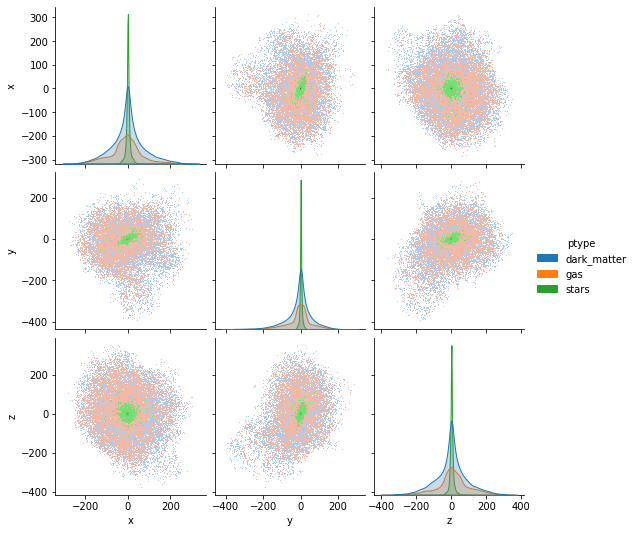

In [23]:
gal.plot.pairplot()

For more details about the galaxy plotting options see [Plotting Tutorial](index.rst).

Also, the user can see it in data frame format using the property [to_dataframe()](../api/core/data.rst#galaxychop.core.data.Galaxy.to_dataframe).
This method create Pandas DataFrames with the particle data.

In [24]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


It is also possible to create the DataFrame the data only for a particular subset of particles:
 
Example of DataFrame using the particle set method for gas particles only:

In [25]:
gal.gas.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,gas,2,2.579203e+06,0.255179,-0.317399,-0.722907,1.739517,-49.440781,-53.145966,0.0,-189770.988215,2635.955184,-187135.033032,-18.872611,12.304235,-12.064137
1,gas,2,1.368585e+06,0.144436,-0.273204,-0.920894,-2.254318,-49.588120,-54.291103,0.0,-189253.154793,2705.793726,-186547.361067,-30.832816,9.917571,-7.778194
2,gas,2,1.392261e+06,0.436985,-0.442400,-0.524567,9.799744,-51.434387,-54.606686,0.0,-189087.359395,2861.710640,-186225.648755,-2.822747,18.721671,-18.140634
3,gas,2,1.548436e+06,0.070196,-0.149943,-0.991583,6.844009,-41.484070,-62.540501,0.0,-189119.151755,2839.541367,-186279.610388,-31.757357,-2.396288,-1.885816
4,gas,2,1.936515e+06,0.458794,-0.134292,-0.716227,-18.536072,-52.246674,-51.899296,0.0,-189389.528067,2883.418881,-186506.109186,-30.450792,37.087136,-26.459731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80148,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
80149,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
80150,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
80151,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


Example of DataFrame for dark matter particles only, but using the Galaxy method:

In [26]:
gal.to_dataframe(ptypes=["dark_matter"])

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,dark_matter,1,7.463453e+06,-0.199597,-0.133327,0.019300,27.392822,-28.606277,-11.712891,0.0,-194263.974644,852.938814,-193411.035829,2.113754,-1.809165,9.361922
1,dark_matter,1,7.463453e+06,-0.193407,0.010379,0.323882,0.424881,16.078735,-21.107315,0.0,-193864.214478,352.112502,-193512.101976,-5.426679,-3.944685,-3.114145
2,dark_matter,1,7.463453e+06,-0.104725,-0.279349,-0.254531,15.411789,-16.983276,-26.899292,0.0,-193553.979331,624.763412,-192929.215919,3.191517,-6.739791,6.083830
3,dark_matter,1,7.463453e+06,-0.035368,0.247132,-0.158874,-6.144241,41.590729,8.691856,0.0,-194863.484787,921.544394,-193941.940393,8.755731,1.283574,0.047461
4,dark_matter,1,7.463453e+06,0.068567,0.201427,0.068706,41.559647,-31.797867,-8.205231,0.0,-195338.697452,1402.817186,-193935.880266,0.531941,3.417993,-10.551514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155096,dark_matter,1,7.463453e+06,122.835357,-102.295263,119.148240,-140.984707,-114.639359,-156.004555,0.0,-26943.758924,28678.145599,1734.386675,29617.604754,2364.795587,-28503.834270
155097,dark_matter,1,7.463453e+06,-3.807391,-112.662019,-170.243235,-110.969055,-128.893845,174.253159,0.0,-28608.222475,29645.958827,1037.736353,-41575.017780,19555.180952,-12011.248486
155098,dark_matter,1,7.463453e+06,206.638302,-120.693961,-232.782225,-148.566986,43.935516,-110.255395,0.0,-17664.029794,18079.365585,415.335791,23534.567606,57366.741333,-8852.377447
155099,dark_matter,1,7.463453e+06,106.611971,20.064196,70.304915,-204.087726,-41.703079,-198.017616,0.0,-38869.770346,41300.961464,2431.191118,-1041.132809,6762.678314,-351.191392


Finally you can extract only a subset of the attributes:

In [27]:
gal.to_dataframe(
    ptypes=["dark_matter"], attributes=["ptype", "x", "total_energy"]
)

,ptype,x,total_energy
0,dark_matter,-0.199597,-193411.035829
1,dark_matter,-0.193407,-193512.101976
2,dark_matter,-0.104725,-192929.215919
3,dark_matter,-0.035368,-193941.940393
4,dark_matter,0.068567,-193935.880266
...,...,...,...
155096,dark_matter,122.835357,1734.386675
155097,dark_matter,-3.807391,1037.736353
155098,dark_matter,206.638302,415.335791
155099,dark_matter,106.611971,2431.191118
